# Get Daily Historical Weather Data 
* Use MeteoStat API: https://dev.meteostat.net/
* Great example of API key in request headers, not in url query params

spokane station id: 72785


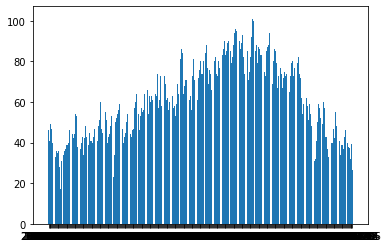

In [11]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

api_key = "YOUR API KEY HERE"

# meteostat API requires your API key be in the request headers, not in the url query params
headers = {"x-api-key": api_key}

# step #1: need to find the weather station id for spokane first
# https://dev.meteostat.net/api/stations/search.html#endpoint
url = "https://api.meteostat.net/v2/stations/search"
# add query params
url += "?query=spokane"

response = requests.get(url=url, headers=headers)
json_object = json.loads(response.text)
data_object = json_object["data"][0]
#print(data_object)
spokane_id = data_object["id"]
print("spokane station id:", spokane_id)

# step #2: use spokane weather station id to get daily weather day for all of 2020 (so far)
# https://dev.meteostat.net/api/stations/daily.html#endpoint
url = "https://api.meteostat.net/v2/stations/daily"
# add query params
url += "?station=" + spokane_id
url += "&start=2020-01-01" # format: YYYY-MM-DD
url += "&end=2020-12-06" # format: YYYY-MM-DD

response = requests.get(url=url, headers=headers)
json_object = json.loads(response.text)
#print(json_object)

# task: produce a plot of the 2020 max temperatures
data_object = json_object["data"]
tmax_ser = pd.Series(dtype=float)
for date_object in data_object:
    date = date_object["date"]
    tmax = date_object["tmax"] * (9 / 5) + 32 # convert C to F
    tmax_ser[date] = tmax
    
# print(tmax_ser)
plt.bar(tmax_ser.index, tmax_ser)
# task for later... make this plot better
# downsample your xticks and rotate them
# title, axis labels, etc.
# aggregate by month
plt.show()